In [1]:
import numpy as np
import matplotlib.pyplot as plt

from preprocessing import load_data, split_data
from utils import load_image, visualization
from augmentation import augment_data
from classification import Classifier


# Importing the provided MNIST dataset

data shape: (2000, 240)
data lable shape: (2000,)


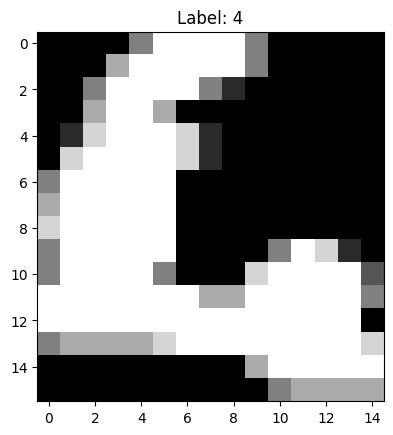

In [2]:
dataset_path = "../data/mfeat-pix"


img_shape = (16, 15)

num_classes = 10
samples_per_class = 200
train_samples_per_class = 100
test_samples_per_class = 100


data = load_data(dataset_path)
data_labels = np.repeat(np.arange(10), samples_per_class) #only possible as the data strucutre is known

print(f'data shape: {data.shape}')
print(f'data lable shape: {data_labels.shape}')

load_image(data, data_labels, index = 879)

# Spliting data into train and test

### As instructed, the data will be split 50/50, that is 1000 test images, and 1000 train images, each of which has 100 images per class.

In [3]:
x_train, x_test = split_data(data, data_labels, num_classes, samples_per_class, train_samples_per_class)
y_train, y_test = np.repeat(np.arange(10), train_samples_per_class), np.repeat(np.arange(10), train_samples_per_class)

print(f'x train shape: {x_train.shape}')
print(f'y train shape: {y_train.shape}')

print(f'x test shape: {x_test.shape}')
print(f'y test shape: {y_test.shape}')

x train shape: (1000, 240)
y train shape: (1000,)
x test shape: (1000, 240)
y test shape: (1000,)


# Data augmentation

Maybe also put this into experiments?

In [4]:
np.random.seed(42)   #So that results may be re-produced

augment_rotate = np.radians(12)
num_versions = 4

x_train_augmented = augment_data(x_train, img_shape, augment_rotate, num_versions)
y_train_augmented = np.repeat(np.arange(10), (1+num_versions)*train_samples_per_class) #only possible as the data strucutre is known

print(f'x train augmented shape: {x_train_augmented.shape}')
print(f'y train augmented shape: {y_train_augmented.shape}')

x train augmented shape: (5000, 240)
y train augmented shape: (5000,)


# Standardization

In [5]:
mean_a= np.mean(x_train_augmented)
std_a = np.std(x_train_augmented)

x_train_augmented = (x_train_augmented - mean_a)/std_a 
x_test_a = (x_test - mean_a)/std_a                         #standardize the test data whic is going to be used

#Also standerdize the non augmented data for later testing on just the basic data
mean= np.mean(x_train)
std = np.std(x_train)

x_train = (x_train - mean)/std
x_test = (x_test - mean)/std   


#checking if normalization worked
print(f'New x augmented mean: {np.mean(x_train_augmented)}')
print(f'New x augmented std: {np.std(x_train_augmented)}')
print('\n')
print(f'New x mean: {np.mean(x_train)}')
print(f'New x std: {np.std(x_train)}')

New x augmented mean: -2.2997899880768577e-16
New x augmented std: 0.9999999999999996


New x mean: -1.2126596023639044e-16
New x std: 0.9999999999999997


# Experimentation

### For every iteration of the model, 150 epochs will be run, and the loss function is categorical cross entropy.



In [6]:
epochs = 10
loss = 'cross_entropy'

## 1.  Single Hidden Layer

In [7]:
hidden_architecture_1 = [64]

optimizer_1 = 'gd'


model_1_a = Classifier(x_train_augmented, y_train_augmented, x_test_a, y_test, hidden_architecture_1) 
model_1_a.data_schuffel()
params_1_a, history_1_a  = model_1_a.train(loss = loss, optimizer= optimizer_1, epochs = epochs, batch_size = 7)

CUDA backend failed to initialize: INTERNAL: no supported devices found for platform CUDA (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Epoch 10
Train Loss: 0.1286 |Train Accuracy: 0.9454
Test Loss: 0.2260 |Test Accuracy: 0.9450
--------------------------------------------------------------------


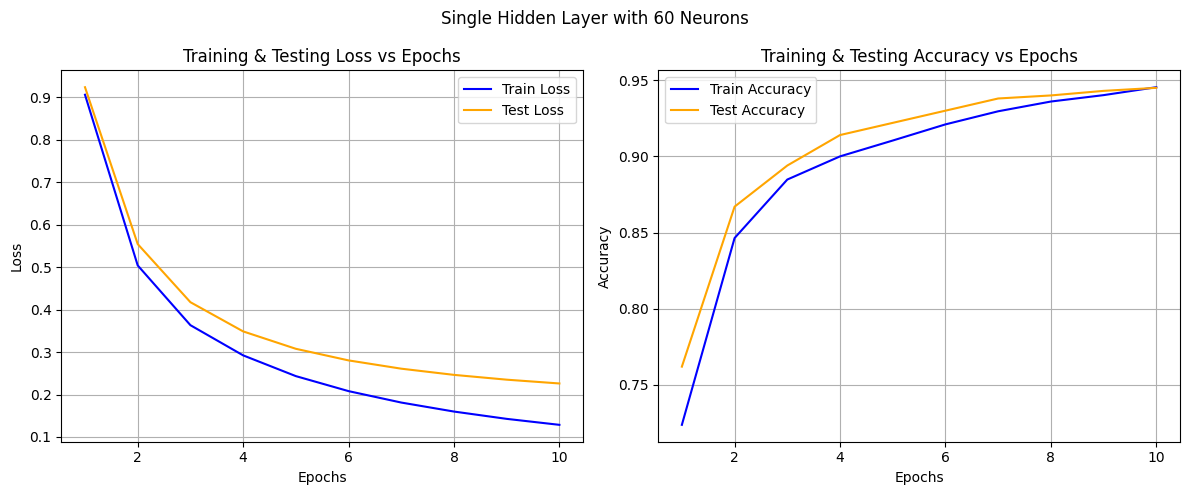

In [8]:
visualization(history_1_a, 'Single Hidden Layer with 60 Neurons', epochs=epochs)

## 2. Deeper Architectures

In [9]:
hidden_architecture_2_a_1 = [64, 64, 64]
hidden_architecture_2_a_2 = [32, 64, 32]
hidden_architecture_2_a_3 = [64, 32, 64]
hidden_architecture_2_a_4 = [16, 32, 64]
hidden_architecture_2_a_5 = [64, 32, 16]

architecture_2_A= [[64, 64, 64], [32, 64, 32], [64, 32, 64], [16, 32, 64], [64, 32, 16]]

models_2_a_A = []
params_2_a_A = []
histories_2_a_A = []
accuracies_2_A = []

optimizer_2 = 'gd'

for architecture in architecture_2_A:
    print(f'Architecture: {architecture}')
    print('-----------------------------')
    model_i_a = Classifier(x_train_augmented, y_train_augmented, x_test_a, y_test, architecture) 
    model_i_a.data_schuffel()
    params_i_a, history_i_a  = model_i_a.train(loss = loss, optimizer= optimizer_2, epochs = epochs, batch_size = 50)
    accuracy_i_a = model_i_a.accuracy(params_i_a, x_test_a, y_test)
    
    
    models_2_a_A.append(model_i_a)
    params_2_a_A.append(params_i_a)
    histories_2_a_A.append(history_i_a)
    accuracies_2_A.append(accuracy_i_a)
    print('\n')

Architecture: [64, 64, 64]
-----------------------------
Epoch 10
Train Loss: 0.6772 |Train Accuracy: 0.8308
Test Loss: 0.5532 |Test Accuracy: 0.8610
--------------------------------------------------------------------


Architecture: [32, 64, 32]
-----------------------------
Epoch 10
Train Loss: 0.6925 |Train Accuracy: 0.7550
Test Loss: 0.7133 |Test Accuracy: 0.8000
--------------------------------------------------------------------


Architecture: [64, 32, 64]
-----------------------------
Epoch 10
Train Loss: 0.6910 |Train Accuracy: 0.8198
Test Loss: 0.5803 |Test Accuracy: 0.8600
--------------------------------------------------------------------


Architecture: [16, 32, 64]
-----------------------------
Epoch 10
Train Loss: 0.9333 |Train Accuracy: 0.6578
Test Loss: 1.0903 |Test Accuracy: 0.6510
--------------------------------------------------------------------


Architecture: [64, 32, 16]
-----------------------------
Epoch 10
Train Loss: 1.3277 |Train Accuracy: 0.5794
Test Lo

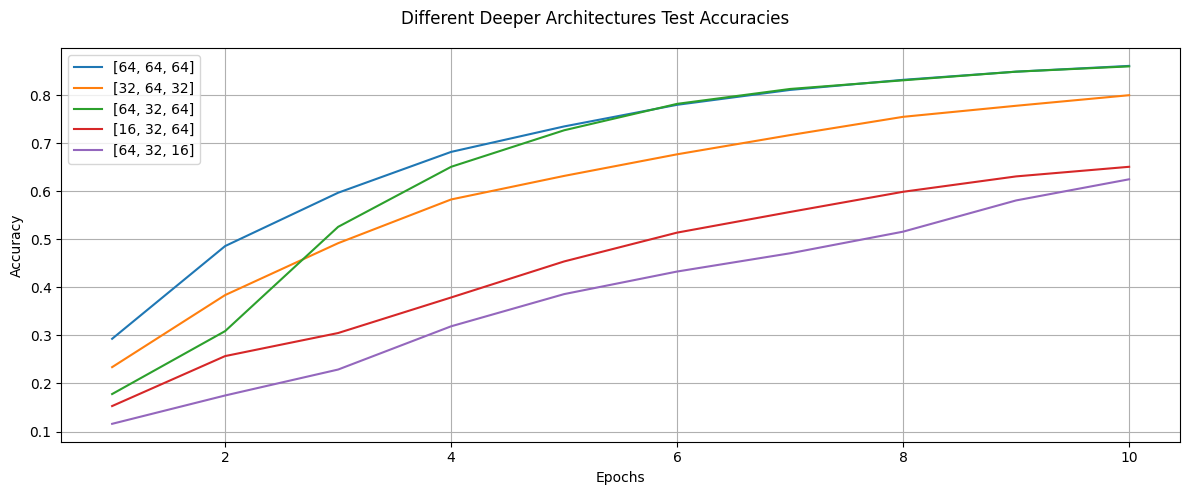

In [10]:

title = 'Different Deeper Architectures Test Accuracies'

num_cases = len(architecture_2_A)

epochs_ = np.linspace(1, epochs, epochs)
# Create figure and subplots
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
fig.suptitle(title)



# Left subplot: Loss vs Epochs
for i in range(num_cases):
    axes.plot(epochs_, histories_2_a_A[i]['accuracy_test'], label= architecture_2_A[i])#, linestyle="dashed")
axes.set_xlabel("Epochs")
axes.set_ylabel("Accuracy")
#axes.set_title("Testing Accuracy vs Epochs")
axes.legend()
axes.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

Maximal Attaind Accuracy
Arhitecture: [64, 64, 64] | Accuracy: 0.8610000610351562


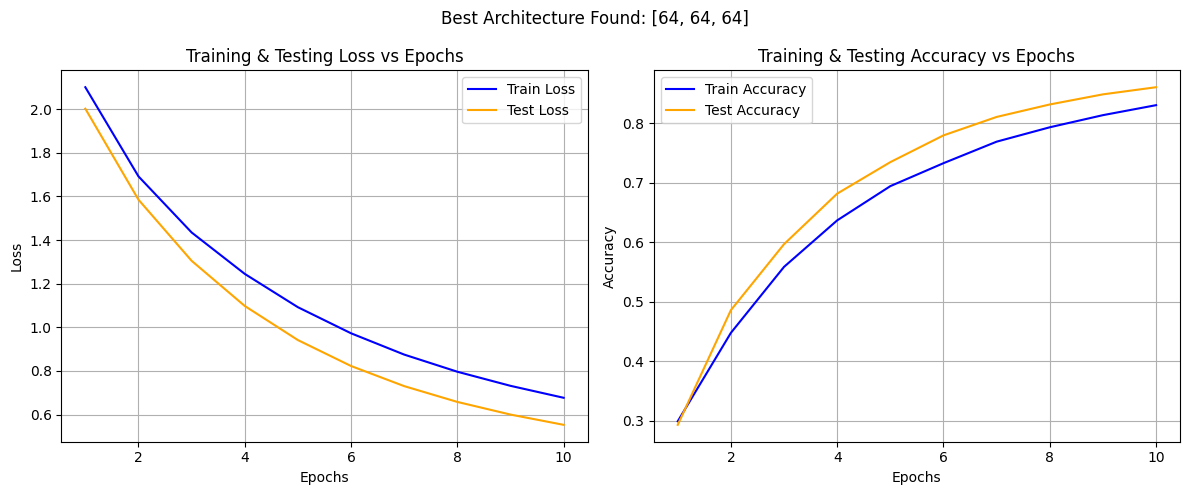

In [11]:
max_acc_index = np.argmax(np.array(accuracies_2_A))

optimial_architecture =  architecture_2_A[max_acc_index]

print('Maximal Attaind Accuracy')
print(f'Arhitecture: {optimial_architecture} | Accuracy: {accuracies_2_A[max_acc_index]}')

visualization(histories_2_a_A[max_acc_index], f'Best Architecture Found: {optimial_architecture}', epochs= epochs)

## 3. Introducing Adam

In [12]:
#whichever one is best from above
architecture_3 = optimial_architecture
optimizer_3 = 'adam'


model_3_a = Classifier(x_train_augmented, y_train_augmented, x_test_a, y_test, optimial_architecture) 
model_3_a.data_schuffel()
params_3_a, history_3_a  = model_3_a.train(loss = loss, optimizer= optimizer_3, epochs = epochs, batch_size = 50)

Epoch 10
Train Loss: 0.0016 |Train Accuracy: 1.0000
Test Loss: 0.1617 |Test Accuracy: 0.9620
--------------------------------------------------------------------


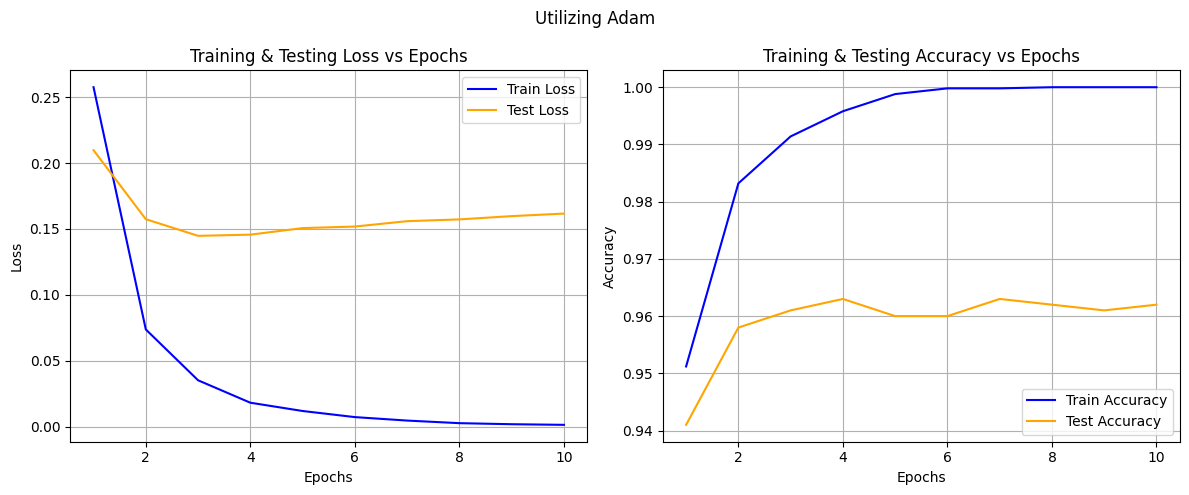

In [13]:
visualization(history_3_a, f'Utilizing Adam',epochs=epochs)

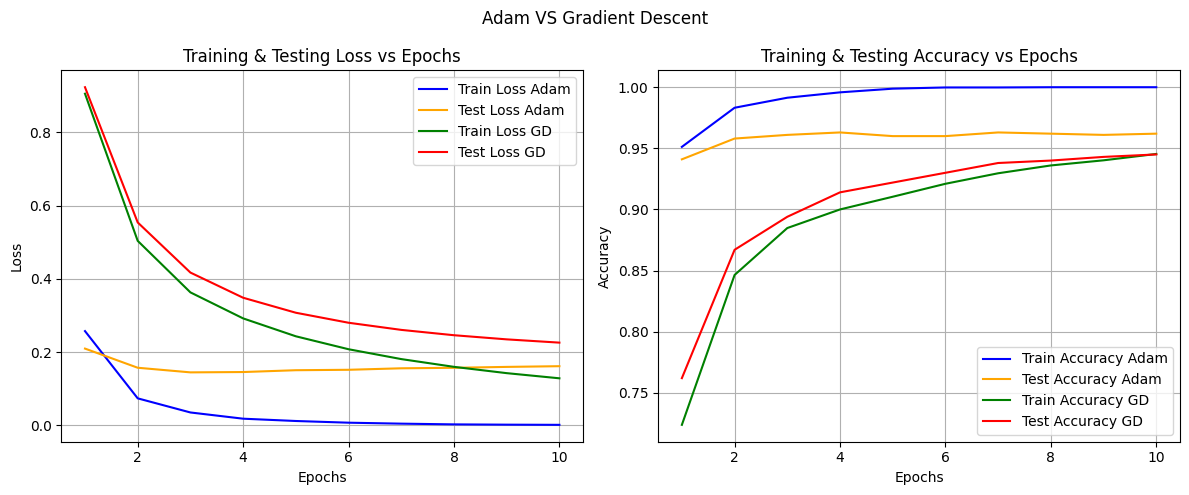

In [14]:
title = 'Adam VS Gradient Descent'



epochs_ = np.linspace(1, epochs, epochs)
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle(title)
# Left subplot: Loss vs Epochs
axes[0].plot(epochs_, history_3_a['loss_train'], label="Train Loss Adam", color="blue")
axes[0].plot(epochs_, history_3_a['loss_test'], label="Test Loss Adam", color="orange")#, linestyle="dashed")


axes[0].plot(epochs_, history_1_a['loss_train'], label="Train Loss GD", color="green")
axes[0].plot(epochs_, history_1_a['loss_test'], label="Test Loss GD", color="red")#, linestyle="dashed")


axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].set_title("Training & Testing Loss vs Epochs")
axes[0].legend()
axes[0].grid(True)

# Right subplot: Accuracy vs Epochs
axes[1].plot(epochs_, history_3_a['accuracy_train'], label="Train Accuracy Adam", color="blue")
axes[1].plot(epochs_, history_3_a['accuracy_test'], label="Test Accuracy Adam", color="orange")#, linestyle="dashed")

axes[1].plot(epochs_, history_1_a['accuracy_train'], label="Train Accuracy GD", color="green")
axes[1].plot(epochs_, history_1_a['accuracy_test'], label="Test Accuracy GD", color="red")#, linestyle="dashed")

axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Training & Testing Accuracy vs Epochs")
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


## 4. Adding Ridge and Lasso Regularization 

In [19]:
#whichever one is best from above
architecture_4 = optimial_architecture
optimizer_4 = 'adam'
# shocase that all three can be utilized
loss_params_4_A = [{'lambda_lasso': 0.0, 'lambda_ridge': 0.0}, {'lambda_lasso': 0.01, 'lambda_ridge': 0.0}, {'lambda_lasso': 0.0, 'lambda_ridge': 0.001},{'lambda_lasso': 0.01, 'lambda_ridge': 0.001}]


models_4_a_A = []
params_4_a_A = []
histories_4_a_A = []
accuracies_4_A = []


for loss_params in loss_params_4_A:
    print(f'Architecture: {loss_params}')
    print('-----------------------------')
    
    model_i_a = Classifier(x_train_augmented, y_train_augmented, x_test_a, y_test, architecture_4) 
    model_i_a.data_schuffel()
    params_i_a, history_i_a  = model_i_a.train(loss = loss, loss_params= loss_params, optimizer= optimizer_4, epochs = epochs, batch_size = 50, epoch_rate = 10)
    accuracy_i_a = model_i_a.accuracy(params_i_a, x_test_a, y_test)
    
    
    models_4_a_A.append(model_i_a)
    params_4_a_A.append(params_i_a)
    histories_4_a_A.append(history_i_a)
    accuracies_4_A.append(accuracy_i_a)
    
    print('\n')
    

Architecture: {'lambda_lasso': 0.0, 'lambda_ridge': 0.0}
-----------------------------
Epoch 10
Train Loss: 0.0016 |Train Accuracy: 1.0000
Test Loss: 0.1617 |Test Accuracy: 0.9620
--------------------------------------------------------------------
Architecture: {'lambda_lasso': 0.01, 'lambda_ridge': 0.0}
-----------------------------
Epoch 10
Train Loss: 1.9126 |Train Accuracy: 0.9114
Test Loss: 1.8949 |Test Accuracy: 0.9200
--------------------------------------------------------------------
Architecture: {'lambda_lasso': 0.0, 'lambda_ridge': 0.001}
-----------------------------
Epoch 10
Train Loss: 0.2291 |Train Accuracy: 0.9998
Test Loss: 0.3543 |Test Accuracy: 0.9660
--------------------------------------------------------------------
Architecture: {'lambda_lasso': 0.01, 'lambda_ridge': 0.001}
-----------------------------
Epoch 10
Train Loss: 1.9291 |Train Accuracy: 0.9108
Test Loss: 1.9100 |Test Accuracy: 0.9200
-------------------------------------------------------------------

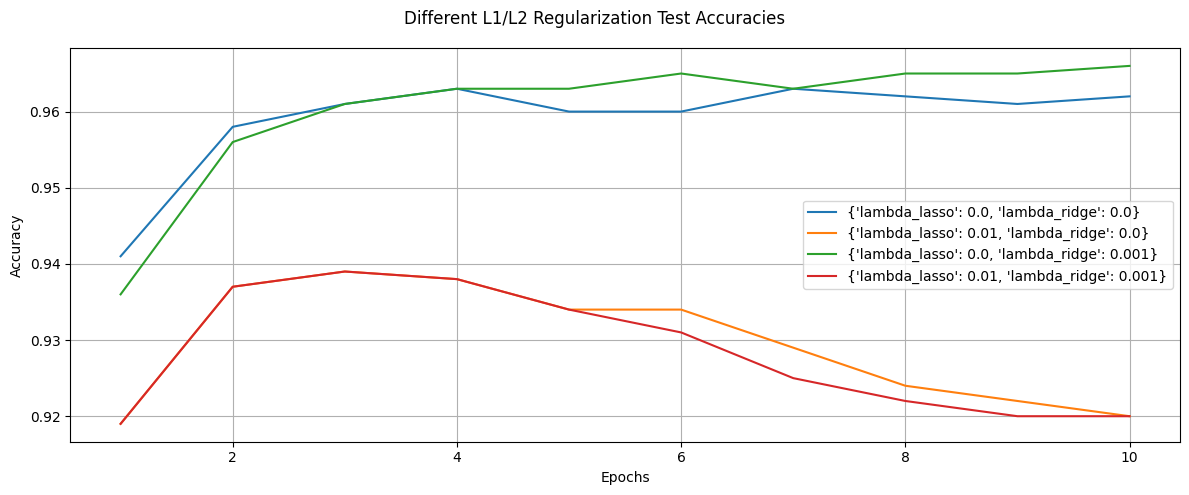

In [20]:
#make a plot of all of them and table of accuracies between the fidderent values

title = 'Different L1/L2 Regularization Test Accuracies'

num_cases = len(loss_params_4_A)

epochs_ = np.linspace(1, epochs, epochs)
# Create figure and subplots
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
fig.suptitle(title)


# Left subplot: Loss vs Epochs
for i in range(num_cases):
    axes.plot(epochs_, histories_4_a_A[i]['accuracy_test'], label= loss_params_4_A[i])#, linestyle="dashed")
axes.set_xlabel("Epochs")
axes.set_ylabel("Accuracy")
#axes.set_title("Testing Accuracy vs Epochs")
axes.legend()
axes.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

## 5. Hyperparameter Tuning

In [21]:
#initizlize the classification training class
hidden_architecture_5 = [10, 50, 10]

optimizer_5 = 'adam' 

search_params = {'alpha':[0.001, 0.0005, 0.0001], 'lasso':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'ridge':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100] ,  'batch':[16, 32, 64, 128, 256]} 


model_5_a = Classifier(x_train_augmented, y_train_augmented, x_test_a, y_test, hidden_architecture_5)
best_optimization_params, best_loss_params, best_batch_size = model_5_a.hyperparameter_search(3, loss, optimizer_5, search_params, epochs = epochs)


Testing con: alpha=0.001, Lasso=0.0001, Ridge=0.0001, batch_size=16
Epoch 10
Train Loss: 0.0812 |Train Accuracy: 0.9828
Test Loss: 0.2185 |Test Accuracy: 0.9480
--------------------------------------------------------------------
Epoch 10
Train Loss: 0.2415 |Train Accuracy: 0.9805
Test Loss: 0.2252 |Test Accuracy: 0.9490
--------------------------------------------------------------------
Epoch 10
Train Loss: 0.0760 |Train Accuracy: 0.9763
Test Loss: 0.2285 |Test Accuracy: 0.9440
--------------------------------------------------------------------


KeyboardInterrupt: 

# Final Model 

In [ ]:
hiddem_architectura = optimial_architecture
optimizer_final_a = 'adam'

model_final_a = Classifier(x_train_augmented, y_train_augmented, x_test_a, y_test, hiddem_architectura)
model_final_a.data_schuffel()
params_final_a, history_final_a = model_final_a.train(loss = loss, loss_params= best_loss_params, optimizer= optimizer_final_a, optimizer_params = best_optimization_params, 
                                   epochs = epochs, batch_size = best_batch_size, epoch_rate = 10)

In [ ]:
visualization(history_final_a, 'Final Model')

## Result on Non-augmented Data 

In [ ]:
hiddem_architectura = optimial_architecture
optimizer_final = 'adam'

model_final = Classifier(x_train_augmented, y_train_augmented, x_test_a, y_test, hiddem_architectura)
model_final.data_schuffel()
params_final, history_final = model_final.train(loss = loss, loss_params= best_loss_params, optimizer= optimizer_final, optimizer_params = best_optimization_params, 
                                   epochs = epochs, batch_size = best_batch_size)

In [ ]:
#vsiaualize the results
visualization(history_final, f'Final Model With Only Base Data')